In [ ]:
!pip install parsivar

     |████████████████████████████████| 36.2 MB 1.3 MB/s 
     |████████████████████████████████| 1.5 MB 28.5 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492972 sha256=cb31d1ab9a0eb136d444fe1281137878c06d0631ae61ad913f52222ce0997ad8
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449921 sha256=569166207bd0fa8ed01b21eca7239e386daf7072d57d97cd7f7aa33095105bcb
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
## import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import models
import torchvision.transforms as transforms

In [ ]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:

from os import path
url = 'https://drive.google.com/file/d/11TVxrMoKPg8wufvegY7f_yYo37OOU9ox/view'
id = url.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('email.zip')  


In [ ]:
!unzip email.zip

In [ ]:
import pandas as pd

pd.read_csv("test.csv")

,filename
0,wejcibnxg7kzo6vu5yq3.txt
1,oz5b87mcqs39rdl2vp1f.txt
2,7qulko3jzd9bp0eiy4rg.txt
3,hmxlga801wte75qncvdk.txt
4,rwsa51nj32dmuyoxv0eb.txt
...,...
395,9m1gr4ny7w2j6t5bzcvf.txt
396,ys1mp537wuhxi26fj8bl.txt
397,1o6piea92zfjd4nv50k3.txt
398,zgt3cnd60uoeaf89kr1j.txt


In [ ]:
!pip install hazm

     |████████████████████████████████| 316 kB 12.9 MB/s 
     |████████████████████████████████| 1.4 MB 38.7 MB/s 
     |████████████████████████████████| 233 kB 34.6 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394489 sha256=ebc97909e26f7659398f771de7a78afdee97016e1cfd64fcebbf2e76cec2e044
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154466 sha256=048e5f6b6cc6587de6b93b62f2fa6c6d59a538c27ad99178d79311688d0cb225
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.4.5
    Uninstalling nltk-3.4.5:
      Successfully uninstalled nltk-3.4.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [ ]:
import json
import os
import re

import hazm
import parsivar


normalizer = parsivar.Normalizer()
stemmer = parsivar.FindStems()
lemmatizer = hazm.Lemmatizer()

punctuations = [
            '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '/', ':', ';', '<', '=', '>', '@', '[',
            '\\', ']', '^', '_', '`', '{', '|', '}', '~', '£', '¤', '§', '©', '«', '®', '°', '±', '²', '´', '¸', '»',
            '¼', '½', '¾', '×', '÷', 'ˈ', '˜', '˝', '٪', '٫', '٬', '‐', '–', '—', '‘', '’', '“', '”', '„', '…', '″',
            '‹', '›', '™', '↑', '→', '↓', '⋅', '⌘', '▪', '◄', '○', '♫', '✓', '❤', '《', '》', '爆', '者', '被', '\uf020',
            '\uf04f', '\uf05f', '\uf076', '\uf0a7', '\uf0fc', '﴾', '﴿', '：', '�', '?', '؟', '.', '،', '؛', '•', '●'
        ]
      
latin_characters_pattern = re.compile(
            "["
            "\u0041-\u007a"
            "\u00c0-\u036f"
            "\u0400-\u050f"
            "\u0342-\u03ff"
            "]"
        )
numbers_pattern = re.compile("[0-9]")

def remove_latin_characters(text):
        return latin_characters_pattern.sub(r'', text)

def remove_numbers(text):
        return numbers_pattern.sub('', text)

def remove_punctuations(text):
        for punctuation in punctuations:
            text = text.replace(punctuation, '')
        return text

diacritics_pattern = re.compile("[\u064B-\u065e\u0670\u0674\u06c3\u06d4-\u06ed]")

emojis_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            "]+",
            flags=re.UNICODE
        )

space_patterns = [
            (re.compile("[\u202c\u2005\u2009\u2029\u2066\u3000\ufe0f]"), ' '),
            (re.compile("[\f\r\t\n]"), ' '),
            (re.compile("[\u001f\u009d\u200a\u200e\u200f\u206d\xa0\xad]"), '\u200c'),
            (re.compile("[\u007f\u0085\u061c\u200b\u200d\u202a\u202b\u206f\u2003"
                        "\u2028\u2060\u2063\u2067\u2069\ufeff\ufffc\x18]"), ''),
        ]

stopwords = hazm.stopwords_list()[:200] + [
            'ام', 'م', 'ات', 'ای', 'ی', 'ت', 'اش', 'ش', 'مان', 'یم', 'ایم', 'تان', 'ید', 'اید', 'شان', 'ند', 'اند',
            'است', 'هست', 'بود', 'شد', 'شو', 'باش', 'خواه', 'ها', 'های', 'ان', 'یک', 'دو', 'سه', 'چهار', 'پنج', 'شش',
            'هفت', 'هشت', 'نه', 'ده', 'هستم', 'هستم', 'هست', 'هستید', 'هستیم', 'نیستم', 'نیستی', 'نیست', 'نیستیم',
            'نیستید', 'نیستند'
        ]


def remove_stopwords_and_stem(text):
        tokens = text.split()

        final_tokens = []
        for token in tokens:
            stemmed_token = stemmer.convert_to_stem(lemmatizer.lemmatize(token)).replace('&', '#')
            if '#' in stemmed_token:
                past, present = stemmed_token.split('#')
                stemmed_token = past if past in token else present
            if token not in stopwords and stemmed_token not in stopwords:
                final_tokens.append(stemmed_token)

        return ' '.join(final_tokens)

def remove_diacritics(text):
        return diacritics_pattern.sub(r'', text)

def remove_emojis(text):
        return emojis_pattern.sub(r'', text)

def unify_spaces(text):
        for pattern, repl in space_patterns:
            text = pattern.sub(repl, text)
        text = text.replace('  ', ' ')
        return text
def clean_text(text):
  
  text = normalizer.sub_alphabets(text)

  text = remove_latin_characters(text)
  text = remove_numbers(text)
  text = remove_punctuations(text)
  text = remove_diacritics(text)
  text = remove_emojis(text)
  text = unify_spaces(text)
  text = normalizer.space_correction(text)

  return text

In [ ]:
import os
import shutil

folder_texts = "ok_training/"

text_holder = []
target_holder = []
file_name = []
for dirpath, _, filenames in os.walk(folder_texts):
    for path_text in filenames:

      txt = os.path.abspath(os.path.join(dirpath, path_text))
      with open (txt, "r") as myfile:
        data=myfile.read()
      
      data = clean_text(data)
      data = remove_stopwords_and_stem(data)
      text_holder.append(data)
      file_name.append(path_text)
      target_holder.append(0)


      


In [ ]:
folder_texts = "spam_training/"


for dirpath, _, filenames in os.walk(folder_texts):
    for path_text in filenames:

      txt = os.path.abspath(os.path.join(dirpath, path_text))
      with open (txt, "r") as myfile:
        data=myfile.read()
      
      data = clean_text(data)
      data = remove_stopwords_and_stem(data)
      text_holder.append(data)
      file_name.append(path_text)
      target_holder.append(1)

In [ ]:
folder_texts = "test/"

text_holder_test = []
file_name_test = []
for dirpath, _, filenames in os.walk(folder_texts):
    for path_text in filenames:

      txt = os.path.abspath(os.path.join(dirpath, path_text))
      with open (txt, "r") as myfile:
        data=myfile.read()
      
      data = clean_text(data)
      data = remove_stopwords_and_stem(data)
      text_holder_test.append(data)
      file_name_test.append(path_text)



In [ ]:
import pandas as pd

In [ ]:
test_df = pd.DataFrame({'file': file_name_test, 'email':text_holder_test})
test_df

,file,email
0,sgtv892uqkfpjna6e0m1.txt,مطالعه زبانشناسی فلسفه روان‌شناسی دونست زبانشن...
1,pakzu3r40jbm6o75n8gl.txt,دان ریشه علت پنهان درصد طلاق نارضایتی جنس محصو...
2,1dhv9ty7uar8q3jc4sog.txt,بس الله الرحمن الرحیم حجت الاسلام والمسلمین جن...
3,zilbkm0osa7py6dcw3u4.txt,فروشگاه اینترنت عتیقه جا فروشگاه خاطره تخصص تر...
4,ms6j1yfntd8p0vioxcu3.txt,فروش شماره موبایل مناطق تهران نقشه کامل مناطق ...
...,...,...
395,h0ryeivflnk2cjgqo61t.txt,مینو جان رتبه شبانه سمنان اونم ازفا قبول اگه م...
396,jkt4zfl6sv2gmu38x51n.txt,دوست عزیز لطفا خواندن مطالب امتیاز مثبت منفی ه...
397,w2d1uv359glzem7konas.txt,مجموعه آموزش آکواریوم خانه آموزش تهیه نگهداری ...
398,fpgr8qjs0le7y3dwm4it.txt,پکیج عینک فریم‌دار عینک فریم‌دار طرح مدل همراه...


In [ ]:
train_df = pd.DataFrame({'file': file_name, 'email':text_holder, 'spam':target_holder})
train_df

,file,email,spam
0,hamtraining (36).txt,سلام نمی‌دونم ماده چیه سال زبان انگلیسی‌بودیم ...,0
1,hamtraining (269).txt,سلام آ نوشت روال معمول حضور عزیز کنگره‌بود هما...,0
2,hamtraining (123).txt,خانم علی نژاد سلام مدتی‌بود خواست نویس صبر اب ...,0
3,hamtraining (49).txt,دکتر فهیم آ شناس تر ایشون معنی‌شناسی استاد باس...,0
4,hamtraining (299).txt,سلام راهنمایی دار اگه ایراد نداشته باشه فوق لی...,0
...,...,...,...
595,spamtraining (127).txt,نسیم خنک خوشتون میاد پنکه نصب فوق العاده راحت ...,1
596,spamtraining (25).txt,آموزش ازدواج آموزش ازدواج قیمت تومان تخفیف محص...,1
597,spamtraining (188).txt,گذار گرما محبت احساس لالایی کودکانه مجموعه کام...,1
598,spamtraining (248).txt,دانلود رایگان فیلم آموزش دانلود اینجا کلیک نما...,1


In [ ]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

,file,email,spam
0,spamtraining (197).txt,﻿\n پک مخصوص کودکان\n\n\n\t\n\n\t\n\n\t\n\t...,1
1,spamtraining (94).txt,﻿\n\nazk2ylc0sxx2mk6qvp5y.jpg\n<http://www.8pi...,1
2,hamtraining (130).txt,﻿نمی دونم کی رفتی که آخرین شادی تو اون بازی و ...,0
3,hamtraining (4).txt,﻿راستی در تایید این مطلب باید عرض کنم من در یک...,0
4,spamtraining (268).txt,﻿\n\n\n راه اندازی سیستم کسب درآمد خودکار\n...,1
...,...,...,...
595,spamtraining (46).txt,﻿\n*پکیج استثنایی آموزش زبانهای انگلیسی، آلمان...,1
596,hamtraining (53).txt,﻿سلام. نیازی به عضویت نیست. من اول به اشتباه ل...,0
597,spamtraining (290).txt,﻿\n\n\n شبکه اجتماعی تتی سی فان\n\n*\n*\n*ب...,1
598,hamtraining (181).txt,﻿مدیر مسئول محترم سایت تابناک\nبا سلام\nنظر به...,0


In [ ]:
train_df.to_csv("train_spam.csv", index = False)

In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 18.8 MB/s 
     |████████████████████████████████| 462 kB 41.8 MB/s 


In [ ]:
import tensorflow_hub as hub

import pandas as pd

import tensorflow_text as text

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

import numpy as np

In [ ]:
train_df['spam'].value_counts()

1    300
0    300
Name: spam, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(train_df['email'], train_df['spam'], test_size = 0.0)

ValueError: ignored

In [ ]:
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [ ]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

In [ ]:
# creating final model
model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [ ]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [ ]:
# compiling our model
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [ ]:
history = model.fit(train_df['email'], train_df['spam'], epochs = 25)

Epoch 1/25
19/19 [==============================] - 30s 723ms/step - loss: 0.6873 - accuracy: 0.5450 - precision: 0.5491 - recall: 0.5033
Epoch 2/25
19/19 [==============================] - 14s 764ms/step - loss: 0.6833 - accuracy: 0.5667 - precision: 0.5633 - recall: 0.5933
Epoch 3/25
19/19 [==============================] - 14s 719ms/step - loss: 0.6865 - accuracy: 0.5650 - precision: 0.5689 - recall: 0.5367
Epoch 4/25
19/19 [==============================] - 14s 722ms/step - loss: 0.6832 - accuracy: 0.5500 - precision: 0.5490 - recall: 0.5600
Epoch 5/25
19/19 [==============================] - 14s 722ms/step - loss: 0.6767 - accuracy: 0.5667 - precision: 0.5645 - recall: 0.5833
Epoch 6/25
19/19 [==============================] - 14s 724ms/step - loss: 0.6659 - accuracy: 0.6083 - precision: 0.6094 - recall: 0.6033
Epoch 7/25
19/19 [==============================] - 14s 724ms/step - loss: 0.6603 - accuracy: 0.6133 - precision: 0.5939 - recall: 0.7167
Epoch 8/25
19/19 [================

In [ ]:
pred = model.predict(test_df["email"])

In [ ]:
output = np.where(pred>0.5,True, False)

test_df["res"] = output
test_df

,file,email,res
0,jkt4zfl6sv2gmu38x51n.txt,﻿\n\n*agar ba farsi khandan moshkel darid\nbe ...,True
1,a8njik5tyc7umd3rogz1.txt,﻿\nتمام امکانات ذکر شده رایگان است.\nاگر می خو...,False
2,s6a5g70u91f2v8qtkrjp.txt,﻿\nناب جواهر\nناب جواهربزرگترین فروشگاه اینترن...,False
3,8ua32vlo7fycxmkjiq09.txt,﻿ اینجانب کارمند به شماره کارمندی و تاریخ ا...,False
4,na2rv6kj1c7s85mpwz4h.txt,﻿ سلام. خیلی ممنون برای جواب. من راسش چند وقت ...,False
...,...,...,...
395,7zfvbe6yo5lc2xpmquig.txt,﻿\n\nهموطنان و همرزمان گرامی‌،\n\nاز آنجایی که...,False
396,s6bfwrmh4gupyiv91z2n.txt,﻿\n\n*نابغه ها! جواب رو نخونين ببينين ميتونين ...,False
397,0nt1eaylxfo9md6q8ij7.txt,﻿سلام،\nبسیار مقاله جالبی بود و من بسیار از آن...,False
398,6s47ickeh3la20p5tyqr.txt,﻿الهام جون\nطبق گفته های خواهرم که ارشدو دکترا...,True


In [ ]:
import pandas as pd

out_df = pd.read_csv("test.csv")
out_df


,filename
0,wejcibnxg7kzo6vu5yq3.txt
1,oz5b87mcqs39rdl2vp1f.txt
2,7qulko3jzd9bp0eiy4rg.txt
3,hmxlga801wte75qncvdk.txt
4,rwsa51nj32dmuyoxv0eb.txt
...,...
395,9m1gr4ny7w2j6t5bzcvf.txt
396,ys1mp537wuhxi26fj8bl.txt
397,1o6piea92zfjd4nv50k3.txt
398,zgt3cnd60uoeaf89kr1j.txt


In [ ]:
value_out = []

for i in range(len(out_df)):
  ind = test_df.index[test_df['file'] == out_df.loc[i]['filename']].tolist()[0]

  value_out.append(test_df.loc[ind]['res'])

In [ ]:
out_df['prediction'] = value_out
out_df

,filename,prediction
0,wejcibnxg7kzo6vu5yq3.txt,False
1,oz5b87mcqs39rdl2vp1f.txt,True
2,7qulko3jzd9bp0eiy4rg.txt,True
3,hmxlga801wte75qncvdk.txt,False
4,rwsa51nj32dmuyoxv0eb.txt,True
...,...,...
395,9m1gr4ny7w2j6t5bzcvf.txt,False
396,ys1mp537wuhxi26fj8bl.txt,False
397,1o6piea92zfjd4nv50k3.txt,True
398,zgt3cnd60uoeaf89kr1j.txt,False


In [ ]:
out_df.to_csv("output.csv", index =False)

In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import re

from sklearn.model_selection import train_test_split

X = train_df['email']
y = train_df['spam']

my_additional_stop_words = []


tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(X)

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state = 101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(

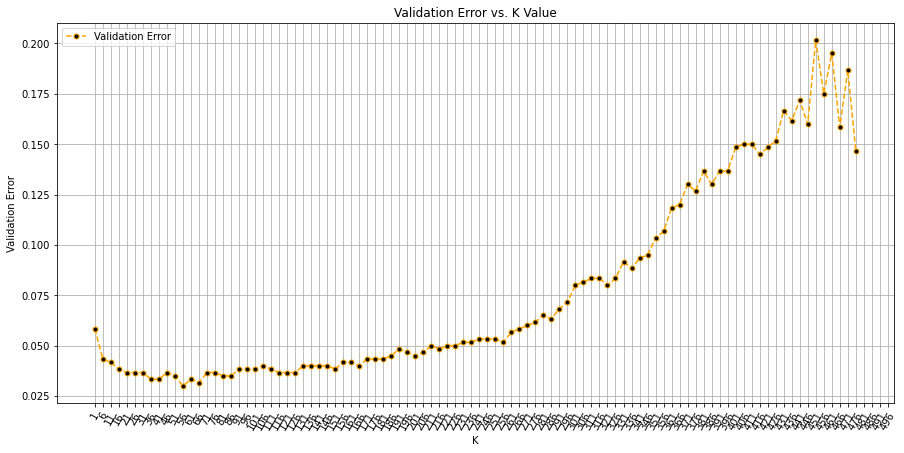

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
val_error_rate = []
neighbors_range = range(1,500,5)

for i in neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    val_error = 1 - cross_val_score(knn, X_tfidf, y,cv=5).mean()
    val_error_rate.append(val_error)

# Plot settings
plt.figure(figsize=(15,7))
plt.plot(neighbors_range, val_error_rate, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5, label='Validation Error')
plt.xticks(np.arange(neighbors_range.start, neighbors_range.stop, neighbors_range.step), rotation=60)
plt.grid()
plt.legend()
plt.title('Validation Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Validation Error')
plt.show()

In [ ]:
best_k = neighbors_range[val_error_rate.index(min(val_error_rate))]
best_k

56

In [ ]:
import seaborn as sns

The accuracy score is: 0.9666666666666667
The classification report is: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.96      0.96      0.96        24

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



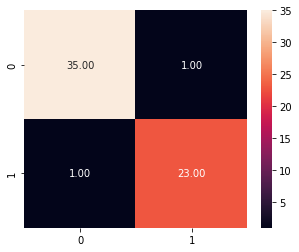

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

print('The accuracy score is:',accuracy_score(y_test,knn_predictions))
print('The classification report is:','\n',classification_report(y_test,knn_predictions))

matrix=confusion_matrix(y_test,knn_predictions)
plt.figure(figsize = (5,4))
sns.heatmap(matrix, annot=True, fmt = '.2f')

In [ ]:
test_x = tfidf.transform(test_df["email"])

In [ ]:
output = knn.predict(test_x)

In [ ]:
output = np.where(output == 1,True, False)


In [ ]:
test_df["res"] = output

In [ ]:
import pandas as pd

out_df = pd.read_csv("test.csv")
out_df


,filename
0,wejcibnxg7kzo6vu5yq3.txt
1,oz5b87mcqs39rdl2vp1f.txt
2,7qulko3jzd9bp0eiy4rg.txt
3,hmxlga801wte75qncvdk.txt
4,rwsa51nj32dmuyoxv0eb.txt
...,...
395,9m1gr4ny7w2j6t5bzcvf.txt
396,ys1mp537wuhxi26fj8bl.txt
397,1o6piea92zfjd4nv50k3.txt
398,zgt3cnd60uoeaf89kr1j.txt


In [ ]:
value_out = []

for i in range(len(out_df)):
  ind = test_df.index[test_df['file'] == out_df.loc[i]['filename']].tolist()[0]

  value_out.append(test_df.loc[ind]['res'])

In [ ]:
out_df['prediction'] = value_out
out_df

,filename,prediction
0,wejcibnxg7kzo6vu5yq3.txt,False
1,oz5b87mcqs39rdl2vp1f.txt,True
2,7qulko3jzd9bp0eiy4rg.txt,False
3,hmxlga801wte75qncvdk.txt,True
4,rwsa51nj32dmuyoxv0eb.txt,True
...,...,...
395,9m1gr4ny7w2j6t5bzcvf.txt,False
396,ys1mp537wuhxi26fj8bl.txt,False
397,1o6piea92zfjd4nv50k3.txt,True
398,zgt3cnd60uoeaf89kr1j.txt,False


In [ ]:
out_df.to_csv("output.csv", index =False)